# Introduction : Is Fandango still "rigged" ?


Walk Hickey, a data journalist from FiveThirtyEight published an article in October 2015 that was controversial in movie circles. He found that there is strong evidence to suggest that Fandango, the movie rating and ticket selling website, was biased and dishonest. 
Details about his article can be found here:https://fivethirtyeight.com/features/fandango-movies-ratings/

After this article was published, Fandango replied saying it was a bug in their system, and have fixed it. Our job today is to look at if there is a change in the rating system after Hickey published his article.

This is part of DataQuest's Guided Projects under the Data Analysis Course.

# Importing the required Libraries

In [33]:
import pandas as pd
import numpy as np
from numpy import arange

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Data Look-through

We will be using two datasets for our mission. One dataset contains the movies  and ratings from 2015, which was published before Hickey's article. The other dataset contains ratings of movies after the article (2016 movies).

Dataset for 2015 can be found here:https://github.com/fivethirtyeight/data/tree/master/fandango

Dataset for 2016 can be found here:https://github.com/mircealex/Movie_ratings_2016_17

In [2]:
before_hicks = pd.read_csv('fandango_score_comparison.csv')
after_hicks = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
pd.options.display.max_columns = 100

In [4]:
before_hicks.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [5]:
after_hicks.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


**Let's isolate both datasets to focus on the Fandango's ratings only.**

In [6]:
before_hicks = before_hicks[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
after_hicks = after_hicks[['movie', 'year', 'fandango']].copy()

In [7]:
before_hicks.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [8]:
after_hicks.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


According to Hickey's article, he used the following sampling criteria.

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015)
- The movie must have had tickets on sale in 2015

# Adjusting the goal of our analysis

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.
Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

# Extracting the samples for our analysis

Lets take ten random samples from the 2016 data set and see if we get a good representative sample for popular movies. We will select 10 random movies and see if atleast 8 of them are popular by going to the site and checking if there are more than 30 ratins per movie, as per Hickey's method.

In [9]:
after_hicks.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


By cross checking with the website, we can confidently say that 90% of the movies of the random sample are popular. Now we will make sure that Hickey's dataset doesnt have unpopular movies.

In [10]:
less_than_30 = before_hicks['Fandango_votes'] < 30
print(less_than_30.sum())

0


Since there are movies of various years, we need to only filter out the movies released in 2015 and 2016 for our reserach.
First, let's work with Hick's dataset to set the movie year and then filter out the 2015 movies.

In [11]:
before_hicks['Year'] = before_hicks['FILM'].str[-5:-1] 

In [12]:
before_hicks.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


Let's get to know what released years our dataset contains

In [13]:
before_hicks["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

Let's tunnel vision out dataset into just the 2015 released years

In [14]:
before_hicks = before_hicks[before_hicks['Year'] == '2015']

In [15]:
before_hicks.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [16]:
before_hicks["Year"].value_counts()

2015    129
Name: Year, dtype: int64

Now we are 100% sure that Hick's dataset contains only the movies released in 2015.

Next, we will focus on the other dataset. Here, we only want the movies released in 2016.

In [17]:
after_hicks['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [18]:
after_hicks = after_hicks[after_hicks['year']== 2016]

In [19]:
after_hicks['year'].value_counts()

2016    191
Name: year, dtype: int64

# Comparing distribution shapes before Hickey's analysis and after.

Our task is to compare how popular movies in 2015 and 2016 are rated. To do this, lets take the distributions of the two datasets for popular movies. First, let's visualize the kernel density plots.

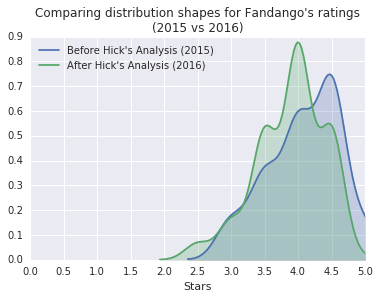

In [36]:
sns.kdeplot(before_hicks['Fandango_Stars'], label="Before Hick's Analysis (2015)", shade=True)
sns.kdeplot(after_hicks['fandango'], label="After Hick's Analysis (2016)", shade=True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)")
plt.xlabel('Star Rating')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

Interestingly, we see a significant difference between how popular movies were rated in 2015 and 2016.

In 2016, after Hick's made his statement, we can see that all the reviews have shifted to the left a bit. While both years show left skewed distributions, the 2016 data shows a lesser left skewness. Since these are popular movies, we can think that this change could be because they "fixed the bug" in the system that rounds the stars to the nearest 0.5 star. 

# Comparing relative frequencies

Obviously, the two datasets have different amounts of movies. So let us see the percentage breakdown of the distributions below.

In [45]:
print("Ratings before Hick's analysis. (2015 Movies)")
print('-'*10)
before_hicks['Fandango_Stars'].value_counts(normalize=True).sort_index()*100


Ratings before Hick's analysis. (2015 Movies)
----------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [46]:
print("Ratings after Hick's analysis. (2016 Movies)")
print('-'*10)
after_hicks['fandango'].value_counts(normalize=True).sort_index()*100

Ratings after Hick's analysis. (2016 Movies)
----------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

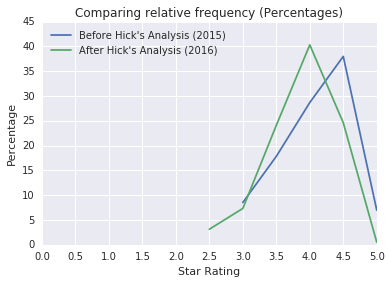

In [58]:
plt.plot(before_hicks['Fandango_Stars'].value_counts(normalize=True).sort_index()*100, label="Before Hick's Analysis (2015)")
plt.plot(after_hicks['fandango'].value_counts(normalize=True).sort_index()*100, label="After Hick's Analysis (2016)")

plt.title("Comparing relative frequency (Percentages)")
plt.xlabel('Star Rating')
plt.ylabel('Percentage')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.legend(loc = 'upper left')
plt.show()

The propotion of 2016 popular movies with 4.5 or 5 stars seems significantly lower than 2015. In fact, the propotion that contains 5 star ratings fell from 7% to 0.5% in 2016. 
In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

Let's determine the change in direction to see if our kernel density plot was giving us reliable answers


# Determining the Direction of Change

Let's get the basic summary statistics of the two datasets and try to figure out the direction of change. Let us build a dataframe and a visualization for easier understanding .

In [55]:
mean_before = before_hicks['Fandango_Stars'].mean()
mean_after = after_hicks['fandango'].mean()

median_before = before_hicks['Fandango_Stars'].median()
median_after = after_hicks['fandango'].median()

mode_before = before_hicks['Fandango_Stars'].mode()[0] 
mode_after = after_hicks['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_before, median_before, mode_before]
summary['2016'] = [mean_after, median_after, mode_after]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


(0, 5.0)

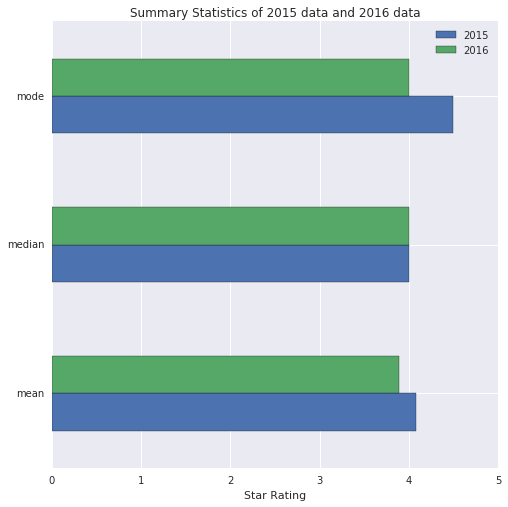

In [72]:
summary.plot.barh(figsize=(8,8))
plt.title('Summary Statistics of 2015 data and 2016 data')
plt.xlabel("Star Rating")
plt.xlim(0,5.0)

As shown by the graph above, the mean rating in 2016 is lower than 2015 by about 0.2. (5% drop relative to 2015).
The median has the same exact value, but the mode has gone down 0.5 points in 2016. This confirms what the kernel density plot told us.

# Conclusion

By this analysis, we can confirm that the popular movies (defined according to Hickey's method) in 2016 were rated lower than in 2015 according to the Fandango website. While this analysis cannot point to the cause of this change, it is safe to assume that Fandango "fixed the bug" that was causing the movies to have a high rating.